### Download the necessary modules

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Import the data in excel file and format them

In [33]:
df_raw =  pd.read_excel('séries_AirLiquide.xlsx')
df_raw.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [34]:
df = df_raw
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [35]:
df['year']=[x.split("M")[0] for x in df['Unnamed: 0']]
df['month']=[x.split("M")[1] for x in df['Unnamed: 0']]
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month
0,1987M03,0.305684,11.1670,NaN,1987,03
1,1987M04,0.306773,11.8679,NaN,1987,04
2,1987M05,0.307862,11.3422,NaN,1987,05
3,1987M06,0.308952,11.0714,NaN,1987,06
4,1987M07,0.310043,10.9918,NaN,1987,07
5,1987M08,0.311138,11.1511,1483.02,1987,08
6,1987M09,0.312236,11.0873,1524.00,1987,09
7,1987M10,0.313339,10.8962,1456.88,1987,10
8,1987M11,0.314448,8.5226,1116.47,1987,11
9,1987M12,0.315563,7.9969,1026.98,1987,12


In [36]:
# Compute the different monthly returns
df['return_price'] = np.log(df['Prix Airliquide']/df['Prix Airliquide'].shift(1)) # p(t)/p(t-1)
df['return_CAC40'] = np.log(df['Indice CAC40']/df['Indice CAC40'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month,return_price,return_CAC40
0,1987M03,0.305684,11.1670,NaN,1987,03,NaN,NaN
1,1987M04,0.306773,11.8679,NaN,1987,04,0.060874,NaN
2,1987M05,0.307862,11.3422,NaN,1987,05,-0.045307,NaN
3,1987M06,0.308952,11.0714,NaN,1987,06,-0.024165,NaN
4,1987M07,0.310043,10.9918,NaN,1987,07,-0.007216,NaN
5,1987M08,0.311138,11.1511,1483.02,1987,08,0.014389,NaN
6,1987M09,0.312236,11.0873,1524.00,1987,09,-0.005738,0.027258
7,1987M10,0.313339,10.8962,1456.88,1987,10,-0.017386,-0.045041
8,1987M11,0.314448,8.5226,1116.47,1987,11,-0.245693,-0.266125
9,1987M12,0.315563,7.9969,1026.98,1987,12,-0.063667,-0.083549


In [37]:
def calculate_beta(df,year):
    ret_price_year = df['return_price'][df['year'] == year]
    ret_CAC_40_year = df['return_CAC40'][df['year'] == year]

    x = ret_price_year.values
    y = ret_CAC_40_year.values

    cov_matrix = np.cov(x,y)
    var_y = np.cov(y) #unbiased estimator
    cov_xy = cov_matrix[1,0]
    beta_xy = cov_xy/var_y
    
    return beta_xy

In [38]:
# Beta computation - to be used for comparison later
beta_estimated = []
years = df['year'].unique()
for year in years :
    beta_estimated.append(calculate_beta(df,year))

In [39]:
beta_estimated

[nan,
 1.0731517824666443,
 1.4156500159210177,
 0.8233344628125394,
 0.736912868784912,
 0.45889650649477093,
 0.8287307193741851,
 0.7748862411482912,
 0.3494384658403971,
 0.7208652554562047,
 0.8746248267328574,
 0.6981721583164723,
 0.6880027689813677,
 0.13801515769794728,
 -0.1110500181018831,
 0.3863661076758203,
 0.5709595411820952,
 0.7402535332150068,
 0.7391130346223183,
 0.9517369531287534,
 0.46303690865028707,
 0.6050649088211724,
 0.8456075661874298,
 0.6396459083501508,
 0.5889400777941592,
 0.5299505864617713,
 0.699306262769653,
 1.1060715072093992,
 1.035352030082284,
 0.9857669128915909,
 1.590649565921565,
 1.031287637369441,
 0.5766849716223721,
 0.7941362128671448]

In [40]:
# Change to annual values
df_yearly = pd.DataFrame() 

dividend_yearly = df.groupby('year')['Div AirLiquide (lissé)'].mean().round(3)
df_yearly['Dividend'] = dividend_yearly

price_yearly = df.groupby('year')['Prix Airliquide'].mean().round(3)
df_yearly['Price'] =  price_yearly

indiceCAC40_yearly = df.groupby('year')['Indice CAC40'].mean().round(3)
df_yearly['CAC40_basis_points']  = indiceCAC40_yearly

df_yearly.head(10)

,Dividend,Price,CAC40_basis_points
year,,,
1987,0.311,10.609,1321.470
1988,0.323,8.497,1229.658
1989,0.336,10.926,1750.667
1990,0.350,12.387,1859.954
1991,0.371,12.834,1764.264
1992,0.398,14.827,1846.913
1993,0.425,16.328,2012.700
1994,0.448,17.275,2065.525
1995,0.469,18.181,1869.042


In [41]:
# Calculate the necessary rates 
df_yearly['Dividend_Rate'] = np.log(df_yearly['Dividend']/df_yearly['Dividend'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly['return_price'] = np.log(df_yearly['Price']/df_yearly['Price'].shift(1)) # p(t)/p(t-1)
df_yearly['return_CAC40'] = np.log(df_yearly['CAC40_basis_points']/df_yearly['CAC40_basis_points'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958


In [42]:
# Load french treasuries bonds and beta
french_bonds_rate =  pd.read_excel('tx_dintéret_OAT_1987_2022.xlsx',sheet_name = 'Final', header = None)
french_bonds_rate.columns = ['year','french_bonds_rate']
french_bonds_rate['year'] = french_bonds_rate['year'].astype(str)
french_bonds_rate.set_index('year', inplace = True)
print(french_bonds_rate)

beta =  pd.read_excel('beta_Air_liquide_1987_2022.xlsx', header = None)
beta.columns = ['year','beta']
beta['year'] = beta['year'].astype(str)
beta.set_index('year', inplace = True)
print(beta)

      french_bonds_rate
year                   
1987           0.096800
1988           0.080000
1989           0.078000
1990           0.075000
1991           0.072000
1992           0.069000
1993           0.067000
1994           0.065000
1995           0.060000
1996           0.062000
1997           0.055000
1998           0.050000
1999           0.034100
2000           0.007000
2001           0.032800
2002           0.033100
2003           0.024500
2004           0.023700
2005           0.042100
2006           0.029100
2007           0.018750
2008           0.042343
2009           0.036488
2010           0.031170
2011           0.033211
2012           0.025360
2013           0.022044
2014           0.016664
2015           0.008419
2016           0.004679
2017           0.008099
2018           0.007841
2019           0.001302
2020          -0.001453
2021           0.007367
2022           0.017008
       beta
year       
1987  0.990
1988  0.950
1989  1.220
1990  0.830
1991  1.510
1992

In [43]:
# Concatenate all our annual data
df_yearly_final = pd.concat([df_yearly,french_bonds_rate, beta], axis=1)
df_yearly_final

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,french_bonds_rate,beta
year,,,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN,0.096800,0.990
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009,0.080000,0.950
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261,0.078000,1.220
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555,0.075000,0.830
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818,0.072000,1.510
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782,0.069000,1.390
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962,0.067000,1.060
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907,0.065000,1.440
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958,0.060000,0.900


### Some NaN values appear at years 1987, 2021 and 2022. Let's discard them

In [44]:
df_yearly_final.drop(['1987','2021', '2022'], axis = 0, inplace = True)
df_yearly_final

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,french_bonds_rate,beta
year,,,,,,,,
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009,0.080000,0.950
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261,0.078000,1.220
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555,0.075000,0.830
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818,0.072000,1.510
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782,0.069000,1.390
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962,0.067000,1.060
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907,0.065000,1.440
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958,0.060000,0.900
1996,0.492,20.877,2082.438,0.047876,0.138271,0.108113,0.062000,0.650


## Estimation of the model

### We will use the Least Square Error Method to find the coefficients from the linearization Y = A*G + U

In [45]:
dividend = df_yearly_final['Dividend']
dividend_rate = df_yearly_final['Dividend_Rate']
price = df_yearly_final['Price']
return_CAC40 = df_yearly_final['return_CAC40']
french_bonds_rate = df_yearly_final['french_bonds_rate']
beta = df_yearly_final['beta']

#### 1st approach : we consider A0 unknown 

In [46]:
Y1 = (dividend.shift(-1)/price)-french_bonds_rate
Y2 = beta*(return_CAC40 - french_bonds_rate)
Y = Y1 - Y2
gt = dividend_rate
print(Y)
print(gt)

year
1988    0.103952
1989   -0.381784
1990   -0.033060
1991    0.147487
1992   -0.008063
1993   -0.059662
1994    0.018443
1995    0.111024
1996   -0.066731
1997   -0.147067
1998   -0.253003
1999   -0.178427
2000   -0.264059
2001    0.175812
2002    0.289943
2003    0.139257
2004   -0.022486
2005   -0.107095
2006   -0.128268
2007   -0.032218
2008    0.099246
2009    0.225292
2010   -0.046874
2011    0.016670
2012    0.070674
2013   -0.042985
2014   -0.031867
2015   -0.009941
2016    0.067325
2017   -0.077319
2018    0.002465
2019    0.010873
2020         NaN
dtype: float64
year
1988    0.037859
1989    0.039459
1990    0.040822
1991    0.058269
1992    0.070250
1993    0.065637
1994    0.052704
1995    0.045810
1996    0.047876
1997    0.068722
1998    0.095828
1999    0.121607
2000    0.138101
2001    0.145757
2002    0.118038
2003    0.058519
2004   -0.010654
2005   -0.038715
2006    0.021032
2007    0.089074
2008    0.107353
2009    0.088774
2010    0.068397
2011    0.068575
2012  

In [47]:
# Get rid of the nan values
Y=Y[:-1]
gt=gt[:-1]

Y=np.array(Y.values)
Y=np.transpose(Y)
G=np.array([np.ones(len(gt)),gt.values])
G=np.transpose(G)
print(Y)
print(G)
print(Y.shape)
print(G.shape)

[ 0.10395161 -0.38178447 -0.03305981  0.14748678 -0.00806304 -0.05966167
  0.01844251  0.11102381 -0.06673057 -0.14706729 -0.25300345 -0.17842686
 -0.26405949  0.17581159  0.28994251  0.13925697 -0.02248624 -0.10709454
 -0.12826831 -0.03221773  0.09924566  0.22529234 -0.0468739   0.01667027
  0.07067357 -0.042985   -0.03186719 -0.00994058  0.06732505 -0.07731923
  0.00246522  0.01087325]
[[ 1.          0.03785941]
 [ 1.          0.03945884]
 [ 1.          0.04082199]
 [ 1.          0.05826891]
 [ 1.          0.07024994]
 [ 1.          0.06563716]
 [ 1.          0.05270406]
 [ 1.          0.04580954]
 [ 1.          0.04787595]
 [ 1.          0.06872183]
 [ 1.          0.09582755]
 [ 1.          0.12160713]
 [ 1.          0.13810109]
 [ 1.          0.14575689]
 [ 1.          0.11803843]
 [ 1.          0.05851942]
 [ 1.         -0.01065385]
 [ 1.         -0.03871451]
 [ 1.          0.02103232]
 [ 1.          0.089074  ]
 [ 1.          0.10735309]
 [ 1.          0.08877421]
 [ 1.          

In [48]:
 # Use results from Least Square Error to find the coefficient vector A from the linearization Y = A*G + U
A_1st_part = np.linalg.inv(np.matmul(np.transpose(G),G)) # (inverse of G transpose times G)
A_2nd_part = np.matmul(np.transpose(G),Y) # (G transpose times Y)
A=np.matmul(A_1st_part,A_2nd_part)
A

array([-0.04726409,  0.53538059])

Text(0, 0.5, 'Y term containing the future price')

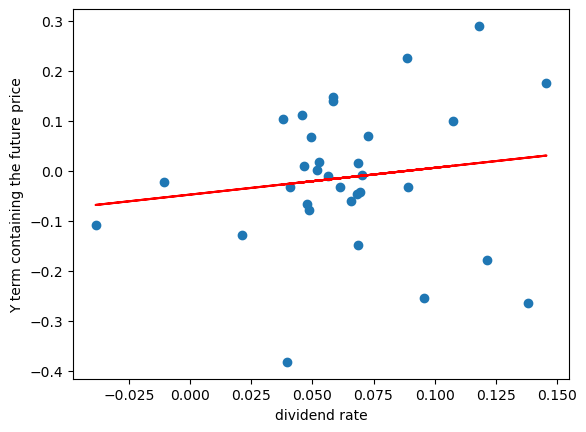

In [49]:
# check graphically the coefficients are good
A0 = A[0]
A1 = A[1]
X = gt.values
Y_pred = A0 + A1*X


plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

#### 2nd approach: we suppose A0 is known and depends on the average rate

In [50]:
Y = (dividend.shift(-1)/price)-french_bonds_rate
gt = dividend_rate

##### 1st step: use as a hypothesis that A0 is the mean of market risk premium on all our study of period

In [51]:
# Reshape the input and output
A0_estimate = beta*(return_CAC40-french_bonds_rate)
A0_estimate = A0_estimate.mean()
Y_prime = Y - A0_estimate

Y = Y[:-1] # remove the nan value as seen before
Y_prime = Y_prime[:-1] # remove the nan value as seen before
gt = gt[:-1] # remove the nan value as seen before
print(A0_estimate)
print(Y_prime)
print(gt)

0.004162435167925896
year
1988   -0.044619
1989   -0.050129
1990   -0.049212
1991   -0.045151
1992   -0.044499
1993   -0.043725
1994   -0.042013
1995   -0.037101
1996   -0.040919
1997   -0.034290
1998   -0.029477
1999   -0.011233
2000    0.018769
2001   -0.007101
2002   -0.005941
2003    0.005220
2004    0.001464
2005   -0.019035
2006   -0.008490
2007    0.000547
2008   -0.020228
2009   -0.006705
2010   -0.007949
2011   -0.010790
2012   -0.002931
2013    0.000057
2014    0.005614
2015    0.010427
2016    0.019330
2017    0.013524
2018    0.013103
2019    0.017585
dtype: float64
year
1988    0.037859
1989    0.039459
1990    0.040822
1991    0.058269
1992    0.070250
1993    0.065637
1994    0.052704
1995    0.045810
1996    0.047876
1997    0.068722
1998    0.095828
1999    0.121607
2000    0.138101
2001    0.145757
2002    0.118038
2003    0.058519
2004   -0.010654
2005   -0.038715
2006    0.021032
2007    0.089074
2008    0.107353
2009    0.088774
2010    0.068397
2011    0.068575
20

In [52]:
# Apply LSE to compute the coefficient A1
numerator_A1_estimate = sum((Y_prime-Y_prime.mean())*(gt-gt.mean()))
denominator_A1_estimate = sum(pow(gt.values-gt.mean(),2))
A1_estimate = numerator_A1_estimate / denominator_A1_estimate
print(numerator_A1_estimate)
print(denominator_A1_estimate)
print(A1_estimate)

0.0040755346736156385
0.04431401251119665
0.09196943455720444


In [53]:
# Check if the coefficients are consistent 
A0_prime = Y_prime.mean() - A1_estimate*gt.mean()
print(A0_prime)
print(A0_estimate)
print(A1_estimate)

-0.020151871099225845
0.004162435167925896
0.09196943455720444


32
32
32


Text(0, 0.5, 'Y term containing the future price')

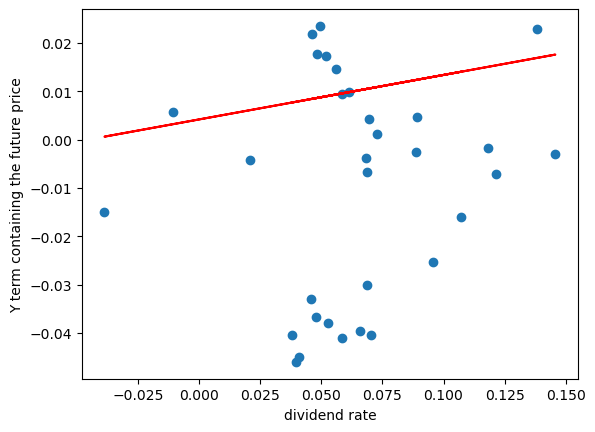

In [54]:
# check graphically the coefficients are good
X = gt.values
Y_pred = A0_estimate + A1_estimate*X

print(len(X))
print(len(Y_pred))
print(len(Y))
plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

##### 2ns step: Check if the hypothesis on the mean is correct by applying the Least Square Error Method directly

In [55]:
Y = (dividend.shift(-1)/price)-french_bonds_rate
gt = dividend_rate

# Get rid of the nan values
Y=Y[:-1]
gt=gt[:-1]

Y=np.array(Y.values)
Y=np.transpose(Y)
G=np.array([np.ones(len(gt)),gt.values])
G=np.transpose(G)

 # Use results from Least Square Error to find the coefficient vector A from the linearization Y = A*G + U
A_1st_part = np.linalg.inv(np.matmul(np.transpose(G),G)) # (inverse of G transpose times G)
A_2nd_part = np.matmul(np.transpose(G),Y) # (G transpose times Y)
A=np.matmul(A_1st_part,A_2nd_part)
A0 = A[0]
A1 = A[1]
print(A0_estimate)
print(A0)
print(A1)

0.004162435167925896
-0.015989435931299954
0.09196943455720452


Text(0, 0.5, 'Y term containing the future price')

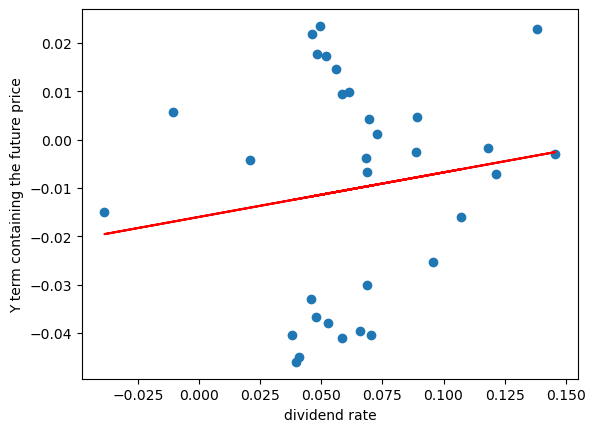

In [56]:
# check graphically the coefficients are good
X = gt.values
Y_pred = A0 + A1*X

plt.scatter(X,Y, label = 'actual values')
plt.plot(X,Y_pred, '-r', label = 'fitted values')
plt.xlabel('dividend rate')
plt.ylabel('Y term containing the future price')

In [57]:
from sklearn.metrics import r2_score
score_r2 = r2_score(Y, Y_pred)
print(score_r2)

0.023324331730400494


In [58]:
(1-score_r2)/(len(Y)-2)

0.03255585560898665

In [59]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=False)
lm.fit(G, Y)

LinearRegression(fit_intercept=False)

In [60]:
print(lm.coef_)
print(lm.intercept_)
print(lm.score(G, Y))

[-0.01598944  0.09196943]
0.0
0.023324331730400494
